In [2]:
import Rwire_to_accuracy_lib as rtl
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
import torch.nn.functional as F
import gc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [10]:



model_param_2 = torch.load('./Lenetq8_sigmoid2x.pt')
sig2_weight = np.concatenate((model_param_2['conv1.weight'].reshape(-1), model_param_2['conv1.bias'].reshape(-1),
                               model_param_2['conv2.weight'].reshape(-1), model_param_2['conv2.bias'].reshape(-1),
                               model_param_2['fc1.weight'].reshape(-1), model_param_2['fc1.bias'].reshape(-1), 
                               model_param_2['fc2.weight'].reshape(-1), model_param_2['fc2.bias'].reshape(-1),
                               model_param_2['fc3.weight'].reshape(-1), model_param_2['fc3.bias'].reshape(-1)),axis=0)
print(sig2_weight.shape)

model_param_1 = torch.load('./Lenetq8_sigmoidx.pt')
sig1_weight = np.concatenate((model_param_1['conv1.weight'].reshape(-1), model_param_1['conv1.bias'].reshape(-1),
                               model_param_1['conv2.weight'].reshape(-1), model_param_1['conv2.bias'].reshape(-1),
                               model_param_1['fc1.weight'].reshape(-1), model_param_1['fc1.bias'].reshape(-1), 
                               model_param_1['fc2.weight'].reshape(-1), model_param_1['fc2.bias'].reshape(-1),
                               model_param_1['fc3.weight'].reshape(-1), model_param_1['fc3.bias'].reshape(-1)),axis=0)
print(sig1_weight.shape)

model_param_3 = torch.load('./Lenetq8_sigmoid3x.pt')
sig3_weight = np.concatenate((model_param_3['conv1.weight'].reshape(-1), model_param_3['conv1.bias'].reshape(-1),
                               model_param_3['conv2.weight'].reshape(-1), model_param_3['conv2.bias'].reshape(-1),
                               model_param_3['fc1.weight'].reshape(-1), model_param_3['fc1.bias'].reshape(-1), 
                               model_param_3['fc2.weight'].reshape(-1), model_param_3['fc2.bias'].reshape(-1),
                               model_param_3['fc3.weight'].reshape(-1), model_param_3['fc3.bias'].reshape(-1)),axis=0)
print(sig3_weight.shape)

model_param_5 = torch.load('./Lenetq8_sigmoid5x.pt')
sig5_weight = np.concatenate((model_param_5['conv1.weight'].reshape(-1), model_param_5['conv1.bias'].reshape(-1),
                               model_param_5['conv2.weight'].reshape(-1), model_param_5['conv2.bias'].reshape(-1),
                               model_param_5['fc1.weight'].reshape(-1), model_param_5['fc1.bias'].reshape(-1), 
                               model_param_5['fc2.weight'].reshape(-1), model_param_5['fc2.bias'].reshape(-1),
                               model_param_5['fc3.weight'].reshape(-1), model_param_5['fc3.bias'].reshape(-1)),axis=0)
print(sig5_weight.shape)

(61706,)
(61706,)
(61706,)
(61706,)


D:\anaconda\envs\Data_analyse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\Data_analyse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\Data_analyse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

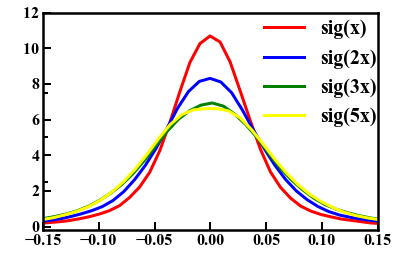

In [51]:
axes = plt.subplot()

axes.minorticks_on()
# 显示副刻度线
axes.tick_params(axis="both", which="major", direction="in", width=2, length=8)
axes.tick_params(axis="both", which="minor", direction="in", width=2, length=5)
# 设置主、副刻度线参数
axes.xaxis.set_minor_locator(MultipleLocator(0.2))
axes.yaxis.set_minor_locator(MultipleLocator(2.5))

# 设置 X 轴上的副刻度线之间的间隔为0.4

###设置坐标轴的粗细
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(2.5);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2.5);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2.5);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2.5);####设置上部坐标轴的粗细

font1 = {'family' : 'Times New Roman','weight' : 'bold','size'  : 16}
ax.set_xlabel(' ',font1,labelpad=1.2)
ax.set_ylabel(' ',font1,labelpad=1.2)
plt.xticks(fontproperties = 'Times New Roman',size = 16,weight = 'bold')
plt.yticks(fontproperties = 'Times New Roman',size = 16,weight = 'bold')


sns.distplot(sig1_weight,hist=False,color = 'red',kde_kws={'label':'sig(x)','linewidth':3})
sns.distplot(sig2_weight,hist=False,color = 'blue',kde_kws={'label':'sig(2x)','linewidth':3})
sns.distplot(sig3_weight,hist=False,color = 'green',kde_kws={'label':'sig(3x)','linewidth':3})
sns.distplot(sig5_weight,hist=False,color = 'yellow',kde_kws={'label':'sig(5x)','linewidth':3})



plt.legend(bbox_to_anchor = (1.05,1.05),loc = 'upper right', frameon=False,prop={"family": "Times New Roman", "size": 20,'weight':'bold'})
# ax.set_xticks([-0.1,-0.05,0,0.05,0.1])
plt.xlim(-0.15,0.15)
plt.ylim(-0.2,12)

plt.savefig('./Lenet_sig_weight_distribution.tif', bbox_inches = 'tight',dpi=300)
plt.show()

In [14]:
model_param_2 = torch.load('./Lenetq8_tanh2x.pt')
tanh2_weight = np.concatenate((model_param_2['conv1.weight'].reshape(-1), model_param_2['conv1.bias'].reshape(-1),
                               model_param_2['conv2.weight'].reshape(-1), model_param_2['conv2.bias'].reshape(-1),
                               model_param_2['fc1.weight'].reshape(-1), model_param_2['fc1.bias'].reshape(-1), 
                               model_param_2['fc2.weight'].reshape(-1), model_param_2['fc2.bias'].reshape(-1),
                               model_param_2['fc3.weight'].reshape(-1), model_param_2['fc3.bias'].reshape(-1)),axis=0)
print(tanh2_weight.shape)

model_param_1 = torch.load('./Lenetq8_tanhx.pt')
tanh1_weight = np.concatenate((model_param_1['conv1.weight'].reshape(-1), model_param_1['conv1.bias'].reshape(-1),
                               model_param_1['conv2.weight'].reshape(-1), model_param_1['conv2.bias'].reshape(-1),
                               model_param_1['fc1.weight'].reshape(-1), model_param_1['fc1.bias'].reshape(-1), 
                               model_param_1['fc2.weight'].reshape(-1), model_param_1['fc2.bias'].reshape(-1),
                               model_param_1['fc3.weight'].reshape(-1), model_param_1['fc3.bias'].reshape(-1)),axis=0)
print(tanh1_weight.shape)

model_param_3 = torch.load('./Lenetq8_tanh3x.pt')
tanh3_weight = np.concatenate((model_param_3['conv1.weight'].reshape(-1), model_param_3['conv1.bias'].reshape(-1),
                               model_param_3['conv2.weight'].reshape(-1), model_param_3['conv2.bias'].reshape(-1),
                               model_param_3['fc1.weight'].reshape(-1), model_param_3['fc1.bias'].reshape(-1), 
                               model_param_3['fc2.weight'].reshape(-1), model_param_3['fc2.bias'].reshape(-1),
                               model_param_3['fc3.weight'].reshape(-1), model_param_3['fc3.bias'].reshape(-1)),axis=0)
print(tanh3_weight.shape)

model_param_5 = torch.load('./Lenetq8_tanh5x.pt')
tanh5_weight = np.concatenate((model_param_5['conv1.weight'].reshape(-1), model_param_5['conv1.bias'].reshape(-1),
                               model_param_5['conv2.weight'].reshape(-1), model_param_5['conv2.bias'].reshape(-1),
                               model_param_5['fc1.weight'].reshape(-1), model_param_5['fc1.bias'].reshape(-1), 
                               model_param_5['fc2.weight'].reshape(-1), model_param_5['fc2.bias'].reshape(-1),
                               model_param_5['fc3.weight'].reshape(-1), model_param_5['fc3.bias'].reshape(-1)),axis=0)
print(tanh5_weight.shape)

(61706,)
(61706,)
(61706,)
(61706,)


D:\anaconda\envs\Data_analyse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\Data_analyse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\Data_analyse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

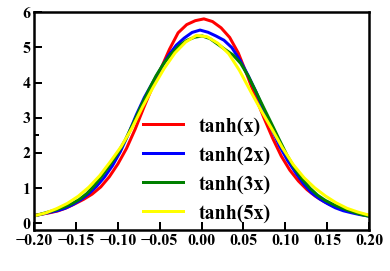

In [60]:
axes = plt.subplot()

axes.minorticks_on()
# 显示副刻度线
axes.tick_params(axis="both", which="major", direction="in", width=2, length=8)
axes.tick_params(axis="both", which="minor", direction="in", width=2, length=5)
# 设置主、副刻度线参数
axes.xaxis.set_minor_locator(MultipleLocator(0.2))
axes.yaxis.set_minor_locator(MultipleLocator(2.5))

# 设置 X 轴上的副刻度线之间的间隔为0.4

###设置坐标轴的粗细
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(2.5);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2.5);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2.5);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2.5);####设置上部坐标轴的粗细

font1 = {'family' : 'Times New Roman','weight' : 'bold','size'  : 16}
ax.set_xlabel(' ',font1,labelpad=0.5)
ax.set_ylabel(' ',font1,labelpad=0.5)
plt.xticks(fontproperties = 'Times New Roman',size = 16,weight = 'bold')
plt.yticks(fontproperties = 'Times New Roman',size = 16,weight = 'bold')


sns.distplot(tanh1_weight,hist=False,color = 'red',kde_kws={'label':'tanh(x)','linewidth':3})
sns.distplot(tanh2_weight,hist=False,color = 'blue',kde_kws={'label':'tanh(2x)','linewidth':3})
sns.distplot(tanh3_weight,hist=False,color = 'green',kde_kws={'label':'tanh(3x)','linewidth':3})
sns.distplot(tanh5_weight,hist=False,color = 'yellow',kde_kws={'label':'tanh(5x)','linewidth':3})



plt.legend(bbox_to_anchor = (0.76,0.6),loc = 'upper right', frameon=False,prop={"family": "Times New Roman", "size": 20,'weight':'bold'})
# ax.set_xticks([-0.1,-0.05,0,0.05,0.1])
plt.xlim(-0.2,0.2)
plt.ylim(-0.2,6)

plt.savefig('./Lenet_tanh_weight_distribution.tif', bbox_inches = 'tight',dpi=300)
plt.show()

In [20]:
model_param_2 = torch.load('./Lenetq8_relu2x.pt')
relu2_weight = np.concatenate((model_param_2['conv1.weight'].reshape(-1), model_param_2['conv1.bias'].reshape(-1),
                               model_param_2['conv2.weight'].reshape(-1), model_param_2['conv2.bias'].reshape(-1),
                               model_param_2['fc1.weight'].reshape(-1), model_param_2['fc1.bias'].reshape(-1), 
                               model_param_2['fc2.weight'].reshape(-1), model_param_2['fc2.bias'].reshape(-1),
                               model_param_2['fc3.weight'].reshape(-1), model_param_2['fc3.bias'].reshape(-1)),axis=0)
print(relu2_weight.shape)

model_param_1 = torch.load('./Lenetq8_relux.pt')
relu1_weight = np.concatenate((model_param_1['conv1.weight'].reshape(-1), model_param_1['conv1.bias'].reshape(-1),
                               model_param_1['conv2.weight'].reshape(-1), model_param_1['conv2.bias'].reshape(-1),
                               model_param_1['fc1.weight'].reshape(-1), model_param_1['fc1.bias'].reshape(-1), 
                               model_param_1['fc2.weight'].reshape(-1), model_param_1['fc2.bias'].reshape(-1),
                               model_param_1['fc3.weight'].reshape(-1), model_param_1['fc3.bias'].reshape(-1)),axis=0)
print(relu1_weight.shape)

model_param_3 = torch.load('./Lenetq8_relu3x.pt')
relu3_weight = np.concatenate((model_param_3['conv1.weight'].reshape(-1), model_param_3['conv1.bias'].reshape(-1),
                               model_param_3['conv2.weight'].reshape(-1), model_param_3['conv2.bias'].reshape(-1),
                               model_param_3['fc1.weight'].reshape(-1), model_param_3['fc1.bias'].reshape(-1), 
                               model_param_3['fc2.weight'].reshape(-1), model_param_3['fc2.bias'].reshape(-1),
                               model_param_3['fc3.weight'].reshape(-1), model_param_3['fc3.bias'].reshape(-1)),axis=0)
print(relu3_weight.shape)



(61706,)
(61706,)
(61706,)


D:\anaconda\envs\Data_analyse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\Data_analyse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\envs\Data_analyse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

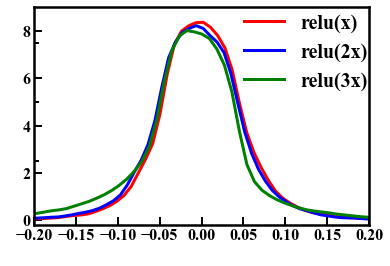

In [63]:
axes = plt.subplot()

axes.minorticks_on()
# 显示副刻度线
axes.tick_params(axis="both", which="major", direction="in", width=2, length=8)
axes.tick_params(axis="both", which="minor", direction="in", width=2, length=5)
# 设置主、副刻度线参数
axes.xaxis.set_minor_locator(MultipleLocator(0.2))
axes.yaxis.set_minor_locator(MultipleLocator(2.5))

# 设置 X 轴上的副刻度线之间的间隔为0.4

###设置坐标轴的粗细
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(2.5);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2.5);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2.5);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2.5);####设置上部坐标轴的粗细

font1 = {'family' : 'Times New Roman','weight' : 'bold','size'  : 16}
ax.set_xlabel(' ',font1,labelpad=0.5)
ax.set_ylabel(' ',font1,labelpad=0.5)
plt.xticks(fontproperties = 'Times New Roman',size = 16,weight = 'bold')
plt.yticks(fontproperties = 'Times New Roman',size = 16,weight = 'bold')


sns.distplot(relu1_weight,hist=False,color = 'red',kde_kws={'label':'relu(x)','linewidth':3})
sns.distplot(relu2_weight,hist=False,color = 'blue',kde_kws={'label':'relu(2x)','linewidth':3})
sns.distplot(relu3_weight,hist=False,color = 'green',kde_kws={'label':'relu(3x)','linewidth':3})




plt.legend(bbox_to_anchor = (1.05,1.05),loc = 'upper right', frameon=False,prop={"family": "Times New Roman", "size": 20,'weight':'bold'})
# ax.set_xticks([-0.1,-0.05,0,0.05,0.1])
plt.xlim(-0.2,0.2)
plt.ylim(-0.2,9)

plt.savefig('./Lenet_relu_weight_distribution.tif', bbox_inches = 'tight',dpi=300)
plt.show()

In [35]:
x = np.arange(-6,6,0.1)
xx = torch.tensor(x)
y = F.relu(xx)


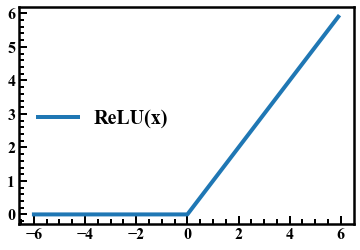

In [38]:
axes = plt.subplot()

axes.minorticks_on()
# 显示副刻度线
axes.tick_params(axis="both", which="major", direction="in", width=2, length=8)
axes.tick_params(axis="both", which="minor", direction="in", width=2, length=5)
# 设置主、副刻度线参数
# axes.xaxis.set_minor_locator(MultipleLocator(0.2))
# axes.yaxis.set_minor_locator(MultipleLocator(2.5))

# 设置 X 轴上的副刻度线之间的间隔为0.4

###设置坐标轴的粗细
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(2.5);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2.5);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2.5);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2.5);####设置上部坐标轴的粗细

font1 = {'family' : 'Times New Roman','weight' : 'bold','size'  : 18}
ax.set_xlabel('',font1,labelpad=0.5)
ax.set_ylabel('',font1,labelpad=0.5)
plt.xticks(fontproperties = 'Times New Roman',size = 16,weight = 'bold')
plt.yticks(fontproperties = 'Times New Roman',size = 16,weight = 'bold')


ax.plot(xx,y,linewidth = 4,label = 'ReLU(x)')




plt.legend(bbox_to_anchor = (0.5,0.61),loc = 'upper right', frameon=False,prop={"family": "Times New Roman", "size": 20,'weight':'bold'})
# ax.set_xticks()
# plt.xlim(-0.2,0.2)
# plt.ylim(-0.2,9)

plt.savefig('./ReLU.tif', bbox_inches = 'tight',dpi=300)
plt.show()